In [1]:
import pandas as pd
import numpy as np
from scipy.special import comb
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import norm

In [2]:
dados = pd.read_csv("dados/dados.csv")
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Distribuição Binominal

<img src="images\dist_binominal.png
    " width=60%>

Evento caracterizado por haver possibilidade de ocorrência de apenas 2 categorias, onde uma anularia a outra se ocorressem. Geralmente é usada para caracterizar SUCESSO e FRACASSO

p = probabilidade de sucesso
q = (1 - p) = probabilidade de fracasso
n = número de eventos estudados
k = números de eventos desejados que tenham sucesso

### Problema da aula 

Em um concurso para preencher uma vaga de Cientista de Dados, temos um total de 80 questões de múltipla escolha, cada uma com três alternativas possíveis. Estas têm o mesmo valor, e suporemos que um candidato que não tenha estudado absolutamente nada resolva fazer a prova e chute todos os resultados. Assumindo que a prova vale 10 pontos e que a nota de corte é 5, ou seja, passará se sua nota for 5 ou mais e reprovará se for menos que 5, qual seria a chance deste candidato passar para próxima etapa do processo seletivo?

In [3]:
# Qual o números de ensaios?
n = 10

# Os ensaios são idependentes?
# Sim, uma questão não influencia a outra

# Somente dois resultados são possíveis  em cada questão?
# Sim, só se pode ACERTAR ou ERRAR uma questão

In [4]:
# Qual a probabilidade de sucesso? (p)
numero_de_alternativas_por_questao = 3
p = 1 / numero_de_alternativas_por_questao
p

0.3333333333333333

In [5]:
# Qual a probabilidade de fracasso? (q = 1 - p)
q = 1 - p
q

0.6666666666666667

In [6]:
# Qual o total de eventos que se deseja obter sucesso? (k)
k = 5
k

5

In [7]:
# Solução 1
probabilidade = (comb(n, k)) * (p ** k) * (q ** (n - k))
print("%0.8f" % probabilidade)

0.13656455


In [8]:
# Solução 2 (usando python)


probabilidade = binom.pmf(k, n, p)
print("%0.8f" % probabilidade)

0.13656455


In [9]:
# Qual a probabilidade de acertos dele?
binom.pmf([5, 6, 7, 8, 9, 10], n, p).sum() # Usando listas para solucionar o problema

0.21312808006909492

In [10]:
# Qual a probabilidade de acertos dele?
1 - binom.cdf(4, n, p) # soma a probabilidade do 1 ao 4

0.21312808006909523

In [11]:
binom.sf(4, n, p) # soma a probabilidade do 5 ao 10

0.21312808006909525

## Exemplo da mega-sena 

Em um exemplo prático bem simples da loteria Mega Sena que tem 60 números, descobriremos a probabilidade de ganhar este prêmio. Já que temos um total de 1 a 60 números para escolher onde a aposta mínima é 6 números, deveremos descobrir o Espaço Amostral e as possibilidades por meio da Combinação. Temos apenas uma chance de ganhar na Mega Sena, e precisamos calcular "1" dividido pelo Espaço Amostral, o qual é justamente a combinação de 60 números de 6 em 6.

In [12]:
combinacoes = comb(60, 6)
combinacoes

50063860.0

In [13]:
probabilidade = 1 / combinacoes # Probabilidade de ganhar na mega-sena
print('%0.15f' % probabilidade)

0.000000019974489


## Exemplo: Gincana
Temos uma cidade do interior que realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última, a proporção de participantes do sexo feminino foi de 60% e o total foi de 30 equipes com 12 integrantes cada uma.

Com as informações acima, deveremos responder quantas equipes são formadas por 8 mulheres.

In [14]:
k = 8 # número de equipes que devem ter mulheres
n = 12 # Número de integrantes das equipes
p = 0.6 # Pois temos 60% de chance de sortear uma mulher

In [15]:
probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.21284094


In [16]:
equipes = 30 * probabilidade # com isso teremos o resultado de 6 equipes com 8 mulheres
equipes

6.3852281856

## Distribuição Poisson

<img src="images\poisson.jpg
    " width=60%>
- É empregada para descrever o número de ocorrências em um intervalo de tempo ou espaço específico. 
--------------------------------------------------------------------------------------------------------------------------------
- e = Constante aproximado cujo valor é 2,718281828459045
- u = representa o numero medio de ocorrencia em um determinado intervalo
- k = número de sucessos no intervalo desejado

### PROBLEMA DELIVERY: 
Um restaurante recebe em média 20 pedidos por hora. Qual a chance de que, e determinada hora escolhida ao acaso, o restaurante receba 15 pedidos?

In [17]:
# QUAL O NÚMERO MÉDIO DE OCORRÊNCIAS POR HORA? (u)
media = 20
media

20

In [18]:
# QUAL O NÚMERO DE OCORRÊNCIAS QUE QUEREMOS OBTER NO PERÍODO? (k)

k

8

In [19]:
# Resolvendo com scipy.stats


media = 20
k = 15
probabilidade = poisson.pmf(k, media)
print("%0.8f" % probabilidade)

0.05164885


## Distribuição normal

<img src="images/3_1_1_normal.jpg
    " width=60%>
    
1. É simétrica em torno da média.
2. A área sob a curva corresponde  à proporção 1 ou 100%.
3. As medidas de tendência central (média, mediana, moda) apresentam o msmo valor.
4. Os extremos da curva  tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo x.
5. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão.
6. A distribuição é definida por sua média e desvio padrão.
7. A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior.

### Tabelas padronizadas

<img src="images/3_2_1_padronizadas.png
    " width=60%>
- x = variavel normal com media u e desvio padrão o
- o = desvio padrão
- u = média

### PROBLEMA: 
Em um estudo sobre alturas dos moradores de uma cidade, verificou-se que o conjunto de dados segue uma aproximada Distribuição Normal, com média de 1,70 metros e desvio padrão de 0.1.
 Com essas informações, deveremos obter três probabilidades:
 1. de uma pessoa selecionada ao acaso ter menos de 1.80 metros
 2. de ter entre 1.60 e 1.80 metros
 3. terceira de ter mais de 1.90 metros de altura.

In [20]:
# Problema 1 Obtendo a variável padronizada Z

media = 1.7 # a variável padronizada Z
desvio_padrao = 0.1 # desvio padrão
Z = (1.8 - media) / desvio_padrao
Z

1.0000000000000009

In [21]:
tabela_normal_padronizada = pd.DataFrame(
    [], 
        index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
        columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


In [22]:
# Problema 1: Obtendo a variável padronizada Z

# Solução 1 Tabela:
media = 1.7 # a variável padronizada Z
desvio_padrao = 0.1 # desvio padrão
Z = (1.8 - media) / desvio_padrao
Z

probabilidade = 0.8413 # Olhando a tabela
# Então, ao calcularmos o Z, podemos procurar na tabela fixa as probabilidades, como resultado, temos que
# a probabilidade ter menos de 1,80 é de 0.8413

In [23]:
# Solução 2 --> Usando scipy -- cdf

norm.cdf(Z) # Apenas colocar o Z

0.8413447460685431

In [24]:
#Problema 2: Variavel paronizada Z

Z_inferior = (1.6 - media)/desvio_padrao # Z para 1.6
round(Z_inferior, 2)
Z_superior = (1.8 - media)/desvio_padrao # Z para 1.8, ambos iguais
round(Z_superior, 2)

#Usando a tabela

probabilidade = (0.8413 - 0.5) * 2 # Queremos apenas a parte de 1.70 até 1.80
probabilidade 

0.6826000000000001

In [25]:
# Usando scipy 

probabilidade = norm.cdf(Z_superior) - (1 - norm.cdf(Z_superior))
probabilidade

0.6826894921370863

In [26]:
#Problema 3: De ter mais de 1.90

# Usando a tabela

Z = (1.9 - media)/desvio_padrao

probabiilidade = 1 - 0.9767
probabilidade

0.6826894921370863

In [27]:
probabilidade = 1 - norm.cdf(Z)
probabilidade

0.02275013194817921

### Amostragem aleatória simples

Uma das principais maneiras de se extrair amostra de população. A exigência fundamental deste tipo de abordagem é que cada elemento da população tenhas as mesmas chances de ser selecionado para fazer parte da amostra.

In [28]:
amostra = dados.sample(n = 100, random_state= 101)

In [29]:
amostra.shape[0]

100

In [30]:
amostra.Renda.mean()

2150.85

In [31]:
dados.Sexo.value_counts(normalize=True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [32]:
amostra.Sexo.value_counts(normalize=True)

0    0.69
1    0.31
Name: Sexo, dtype: float64

### Teoria do Limite Central

- O **TEOREMA DO LIMITE CENTRAL** afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividindo pela raiz quadrada do tamanho da amostra.

### Nível de confiança,  significância e erro inferencial

<img src="images/5_2_3_grafico.png
    " width=40%>
    
- O nível de confiança (1 - a), representa a **probabilidade de acerto estimativa**. De forma complementar o nível de significância(a) expressa a **probabilidade de erro da estimativa**.

<img src="images/5_2_2_erro.png
    " width=40%>
   
- O erro inferencial é definido pelo **desvio padrão das médias amostrais o** e pelo **nível de confiança** determinado para o processo.

## Intervalo de confiança

- **Com desvio padrão populacional conhecido**
<img src="images/4.png
    " width=40%>
    - u =  parâmetro da média populacional
    - x barra = média da amostra selecionada
    - e = erro inferencial, já calculado em z * o / raizN  
- **Com desvio padrão populacional desconhecido**
<img src="images/5.jpg
    " width=40%>

### Resolvendo Problema:

Suponhamos que os pesos dos sacos de arroz de uma indústria alimentícia se distribuam como uma Normal com **desvio padrão populacional igual a 150 gramas**. Selecionando uma **amostra aleatória de 20 sacos** de um lote especifico, obteve-se o **peso médio de 5 mil e 50 gramas para cada saco**. Deveremos construir um Intervalo de Confiança para a **média populacional** assumir **Nível de Significância de 5%**.

In [33]:
media_amostral = 5050 # Media amostral

significancia = 0.05 # Nível de significancia (a)

confianca = 1 - significancia # Nível de confiança (1 - a)

In [34]:
tabela_normal_padronizada[16:26] # Obtendo o Z

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


<img src="images/5_3_1_95.jpg
    " width=40%>
   - O gráfico agora equivale a 95, divide-se para achar a metade, depois some o que falta pra chegara  1 com a metade.
   - Z = 1.96
   
#### Valores de z para os níveis de confiança mais utilizados


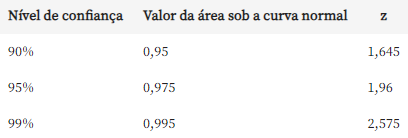


In [35]:
media_amostral = 5050 # Media amostral

significancia = 0.05 # Nível de significancia (a)

confianca = 1 - significancia # Nível de confiança (1 - a)

z = norm.ppf(0.975) # Outra forma de obter o Z

desvio_padrao = 150 # Desvio padrão

n = 20

raiz_de_n = np.sqrt(n)

In [36]:
sigma = desvio_padrao / raiz_de_n
e = z * sigma

In [37]:
# Solução 1 para intervalo de confiança para a média (manual)
intevalo = (
    media_amostral - e , 
    media_amostral + e
)

intevalo

(4984.260809456757, 5115.739190543243)

In [38]:
# Solução 2 para o intervalo de confiança para a média

norm.interval(0.975, loc = media_amostral, scale = sigma)

(4974.821067041828, 5125.178932958172)

# Exercícios

1. Suponha que acabamos de criar um jogo de loteria, chamado Show de prêmios da Alura. Neste nosso novo jogo, o apostador marca 20 números, dentre os 25 disponíveis no bilhete, e pode ganhar até 1 milhão de reais. Determine qual o número de combinações possíveis (espaço amostral) e a probabilidade de se ganhar o prêmio jogando apenas um bilhete (considere apenas quinze casas decimais).

In [39]:
combinacoes = comb(25, 20)

probabilidade = 1 / combinacoes
print('%0.15f' % probabilidade)

0.000018821757952


2. Uma moeda, perfeitamente equilibrada, é lançada para o alto quatro vezes. Utilizando a distribuição binomial, obtenha a probabilidade de a moeda cair com a face coroa voltada para cima duas vezes.

In [40]:
k = 2 # Eventos que queremos obter sucesso
n = 4 # Numero de ensaios
p = 1 / 2 # Probrabilidade de acordo com o numero possiveis de casos
probabilidade = binom.pmf(k, n, p)
probabilidade

0.375

3. Um dado, perfeitamente equilibrado, é lançado para o alto dez vezes. Utilizando a distribuição binomial, obtenha a probabilidade de o dado cair com o número cinco voltado para cima pelo menos três vezes.

In [41]:
k = 3
n = 10
p = 1 / 6
probabilidade = binom.sf(2, n, p) 
probabilidade

0.22477320212874055

4. Suponha que a probabilidade de um casal ter filhos com olhos azuis seja de 22%. Em 50 famílias, com 3 crianças cada uma, quantas podemos esperar que tenham dois filhos com olhos azuis?

In [42]:
k = 2
n = 3
p = 0.22
N = 50
probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

familias = N * probabilidade
familias

0.11325600


5.662799999999996

5. O número médio de clientes que entram em uma padaria por hora é igual a 20. Obtenha a probabilidade de, na próxima hora, entrarem exatamente 25 clientes.

In [43]:
media = 20
k = 25
probabilidade = poisson.pmf(k, media)
print("%0.8f" % probabilidade)

0.04458765


6. A aplicação de uma prova de estatística em um concurso apresentou um conjunto de notas normalmente distribuídas. Verificou-se que o conjunto de notas tinha média 70 e desvio padrão de 5 pontos.

Qual a probabilidade de um aluno, selecionado ao acaso, ter nota menor que 85?

In [44]:
media = 70
desvio_padrao = 5
x = 85
Z = (x - media) / desvio_padrao

probabilidade = norm.cdf(Z)
probabilidade

0.9986501019683699

7. O faturamento diário de um motorista de aplicativo segue uma distribuição aproximadamente normal, com média RS 300,00 e desvio padrão igual a RS 50,00. Obtenha as probabilidades de que, em um dia aleatório, o motorista ganhe:

1) Entre RS 250,00 e RS 350,00

2) Entre RS 400,00 e RS 500,00

In [45]:
# Resolvendo Caso 1:

media = 300
desvio_padrao = 50

Z_caso1 = (350 - media)/desvio_padrao

probabilidade_1 = norm.cdf(Z_caso1) - (1 - norm.cdf(Z_caso1))

# Resolvendo Caso 2:

Z_caso2_superior = (500 - media)/desvio_padrao
Z_caso2_inferior = (400 - media)/desvio_padrao

probabilidade_2 = norm.cdf(Z_caso2_superior) - norm.cdf(Z_caso2_inferior)
probabilidade_2

0.02271846070634609

8. O Inmetro verificou que as lâmpadas incandescentes da fabricante XPTO apresentam uma vida útil normalmente distribuída, com média igual a 720 dias e desvio padrão igual a 30 dias. Calcule a probabilidade de uma lâmpada, escolhida ao acaso, durar:

1) Entre 650 e 750 dias

2) Mais que 800 dias

3) Menos que 700 dias

In [46]:
media = 720
desvio_padrao = 30

# Calculo caso 1

Z_caso1_superior = (750 - media)/desvio_padrao
Z_caso1_inferior = (650 - media)/desvio_padrao

probabilidade1 = norm.cdf(Z_caso1_superior) - norm.cdf(Z_caso1_inferior) 

# Calculo caso 2

Z_caso2 = (800 - media)/desvio_padrao

probabilidade2 = 1 - norm.cdf(Z_caso2)

# Calculo caso 3

Z_caso3 = (700 - media)/desvio_padrao

probabilidade3 = norm.cdf(Z_caso3)


# Printando resultados
print(probabilidade1,"\n", probabilidade2,"\n", probabilidade3,"\n",)


0.8315294174398976 
 0.003830380567589775 
 0.2524925375469229 



9. Utilizando a tabela padronizada, ou o ferramental disponibilizado pelo Python, encontre a área sob a curva normal para os valores de Z abaixo:
1) Z < 1,96

2) Z > 2,15

3) Z < -0,78

4) Z > 0,59


In [47]:
Z1 = norm.cdf(1.96)
Z2 = 1 - norm.cdf(2.15)
Z3 = norm.cdf(-0.78)
Z4 = 1 - norm.cdf(0.59)

print(Z1)
print(Z2)
print(Z3)
print(Z4)

0.9750021048517795
0.015777607391090465
0.21769543758573312
0.27759532475346493


10. Suponha que você esteja realizando um estudo para determinar a média de salários de uma determinada profissão em uma cidade. Você coletou uma amostra de 50 salários e obteve uma média amostral de 3.000,00 reais e um desvio padrão de 500,00 reais.Com base nessas informações, calcule o intervalo de confiança de 95% para a média populacional dos salários.

In [48]:
media_amostral = 3000 

significancia = 0.05 

confianca = 1 - significancia

z = norm.ppf(0.95) 

desvio_padrao = 500 

n = 50

raiz_de_n = np.sqrt(n)

sigma = desvio_padrao / raiz_de_n
e = z * sigma

norm.interval(0.95, loc = 3000, scale = sigma)

(2861.409617565032, 3138.590382434968)

11. Para estimar o valor médio gasto por cada cliente de uma grande rede de fast-food, foi selecionada uma amostra de 50 clientes. Assumindo que o valor do desvio padrão da população seja de 6,00 reais e que esta população se distribui normalmente, obtenha a margem de erro desta estimativa para um nível de confiança de 95%.

In [52]:
n = 50
desvio_padrao = 6
z = norm.ppf(0.95)

raiz_de_n = np.sqrt(n)
sigma = desvio_padrao / raiz_de_n
e = z * sigma
e

1.3957045844120084

12. Uma amostra aleatória simples de 1976 itens de uma população normalmente distribuída, com desvio padrão populacional igual a 11, resultou em uma média amostral de 28. Qual o intervalo de confiança de 90% para a média populacional?

In [56]:
media_amostral = 28
desvio_padrao = 11
n = 1976
z = norm.ppf(0.95)

raiz_de_n = np.sqrt(n)

sigma = desvio_padrao / raiz_de_n

norm.interval(0.90, loc = 28, scale = sigma)

(27.592969951356466, 28.407030048643534)